### About the dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Objective
To classify/predict a patient survival who had undergone surgery for breast cancer.

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv("Haberman.csv",names=['Age', 'Op_Year', 'axil_nodes', 'Surv_status'])
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_Year        306 non-null int64
axil_nodes     306 non-null int64
Surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


####  The dataset has 306 rows and 4 columns including class labels

In [10]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* There are no null values in the data
* The Age ranges from  30 to 83 and the mean age is 52.
* Operation year ranges from 1958 to 1969, maximum operations are done in the year 62.
* Axillary nodes are ranging from 0 to 52,however 25% of the patients do not have any axillary nodes at the time of operation.
* Also the dataset is imbalanced

In [12]:
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

There are more data points in case of survived, so the data is imbalenced.

In [20]:
# modify the target column values to be meaningful as well as categorical
df['Surv_status'] = df['Surv_status'].map({1:"yes", 2:"no"})
df['Surv_status'] = df['Surv_status'].astype('category')
print(df.head())

   Age  Op_Year  axil_nodes Surv_status
0   30       64           1         yes
1   30       62           3         yes
2   30       65           0         yes
3   31       59           2         yes
4   31       65           4         yes


### Univariate Analysis

Countplot,PDF,CDF,Boxplots and Violin Plots

Text(0.5, 1.0, 'Coutplot for Survival status')

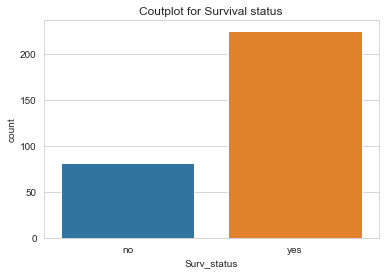

In [30]:
sns.countplot(df['Surv_status'])
plt.title("Coutplot for Survival status")

#### Probablity density function

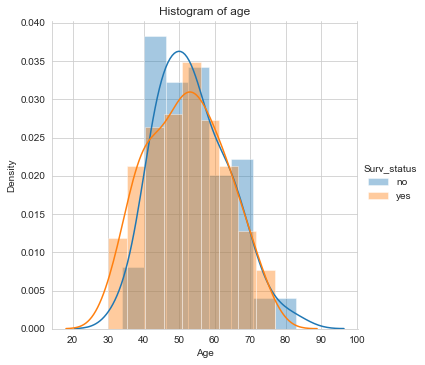

In [23]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show();


* Age is normally distributed 
* Overlaping of data between both the groups

C:\Users\abhijeet\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


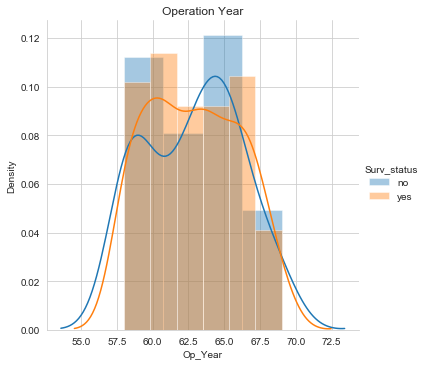

In [24]:
# Operation year
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.title("Operation Year")
plt.ylabel("Density")
plt.show();


* Overlaping of data between both the groups
* Maximumnumber of operation is done in the year 1963 & 1964
* We can observe that as the age is increasing the chances of survival is decreasing

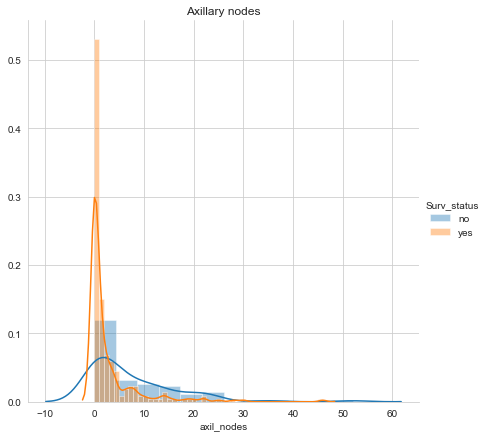

In [28]:
# Axillary nodes
sns.FacetGrid(df, hue="Surv_status", size=6) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Axillary nodes")
plt.show();


* It also has both the groups overlapping
* Most of the patients have axil nodes are less than 10.
* Patients with less number of auxillary nodes when operated tends to be survived.

### CDF
Need for Cumulative Distribution Function (CDF)
* CDF represents the cummulative values of pfd 
We can visually see what percentage of patiets have age greater than or less than 70 are survived 


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


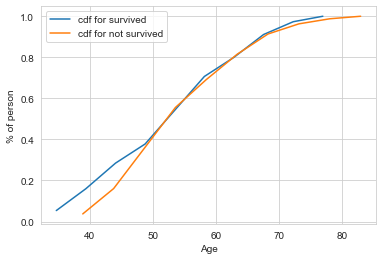

In [42]:
df_surv = df[df['Surv_status'] == 'yes']
df_no_surv = df[df['Surv_status']== 'no']

#Plot CDF for Age

#labels= ['pdf for survived','cdf for survived','pdf for not survived','cdf for not survived']
labels=['cdf for survived','cdf for not survived']
counts, bin_edges = np.histogram(df_surv['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.ylabel("% of person")

counts, bin_edges = np.histogram(df_no_surv['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(labels)
plt.show()




* About 15% of the person less than age 40 are survived
* All person above the age 77 do not survive after operation 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


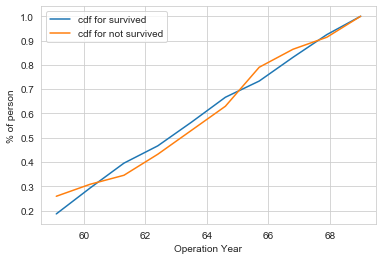

In [43]:
df_surv = df[df['Surv_status'] == 'yes']
df_no_surv = df[df['Surv_status']== 'no']

#Plot CDF for Age

#labels= ['pdf for survived','cdf for survived','pdf for not survived','cdf for not survived']
labels=['cdf for survived','cdf for not survived']
counts, bin_edges = np.histogram(df_surv['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Operation Year")
plt.ylabel("% of person")

counts, bin_edges = np.histogram(df_no_surv['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(labels)
plt.show()




[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


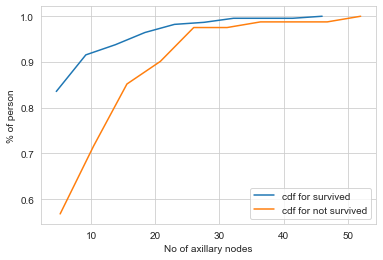

In [44]:
df_surv = df[df['Surv_status'] == 'yes']
df_no_surv = df[df['Surv_status']== 'no']

#Plot CDF for Age

#labels= ['pdf for survived','cdf for survived','pdf for not survived','cdf for not survived']
labels=['cdf for survived','cdf for not survived']
counts, bin_edges = np.histogram(df_surv['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("No of axillary nodes")
plt.ylabel("% of person")

counts, bin_edges = np.histogram(df_no_surv['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(labels)
plt.show()




* About 95% of survived patients has less than 10 axillary node at the time of operation.
* Patients more than 45 axillary nodes does not survived.

### Box plots

Text(0.5, 1.0, 'Boxplot for Survival Status and Age')

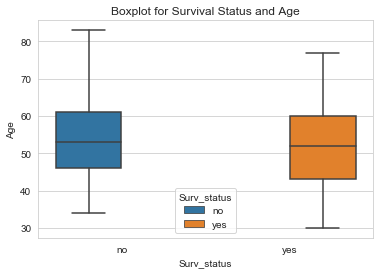

In [49]:
sns.boxplot(data=df,x='Surv_status',y='Age',hue='Surv_status').set_title("Boxplot for Survival Status and Age")

Text(0.5, 1.0, 'Boxplot for Sruvival status and Operation Year')

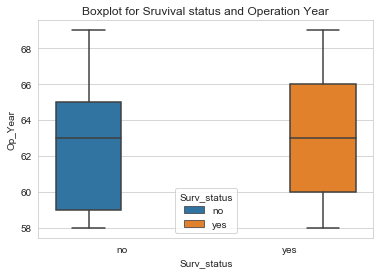

In [52]:
sns.boxplot(data=df,x='Surv_status',y='Op_Year',hue='Surv_status').set_title("Boxplot for Sruvival status and Operation Year")

Text(0.5, 1.0, 'Boxplot for Sruvival status and Axillary Nodes')

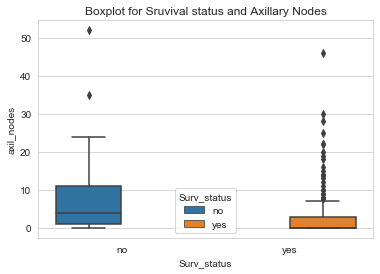

In [53]:
sns.boxplot(data=df,x='Surv_status',y='axil_nodes',hue='Surv_status').set_title("Boxplot for Sruvival status and Axillary Nodes")

### Violin Plots

Text(0.5, 1.0, 'Violin plot for Survival status and Age')

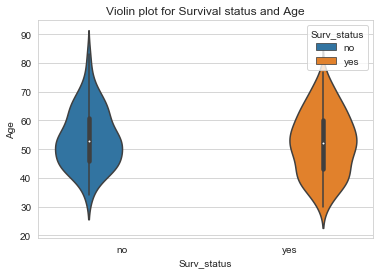

In [56]:
sns.violinplot(data= df ,x='Surv_status',y='Age',hue='Surv_status').set_title('Violin plot for Survival status and Age')

Text(0.5, 1.0, 'Violin plot for Survival status and Operation Year')

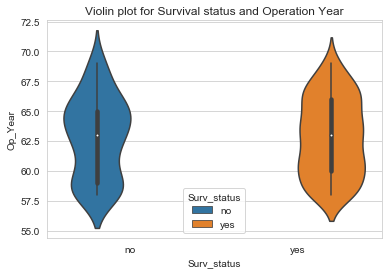

In [58]:
sns.violinplot(data= df ,x='Surv_status',y='Op_Year',hue='Surv_status').set_title('Violin plot for Survival status and Operation Year')

Text(0.5, 1.0, 'Violin plot for Survival status and Axillary Nodes')

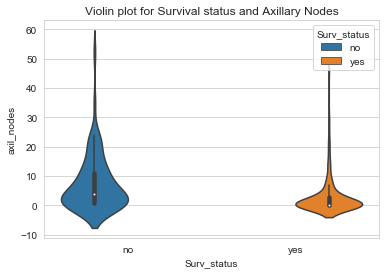

In [59]:
sns.violinplot(data= df ,x='Surv_status',y='axil_nodes',hue='Surv_status').set_title('Violin plot for Survival status and Axillary Nodes')

### Bi variate analysis

C:\Users\abhijeet\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


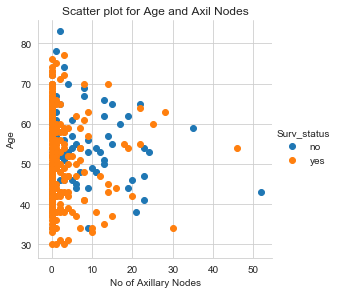

In [63]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "axil_nodes", "Age") \
   .add_legend();
plt.title("Scatter plot for Age and Axil Nodes")
plt.xlabel("No of Axillary Nodes")
plt.ylabel("Age")
plt.show();

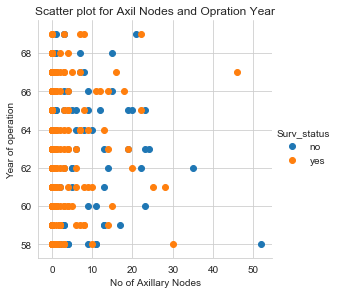

In [65]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "axil_nodes", "Op_Year") \
   .add_legend();
plt.title("Scatter plot for Axil Nodes and Opration Year")
plt.xlabel("No of Axillary Nodes")
plt.ylabel("Year of operation")
plt.show();

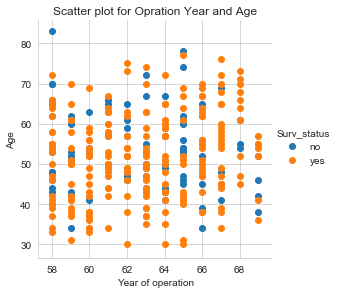

In [66]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "Op_Year",'Age') \
   .add_legend();
plt.title("Scatter plot for Opration Year and Age")
plt.ylabel("Age")
plt.xlabel("Year of operation")
plt.show();

### Multivariate analysis

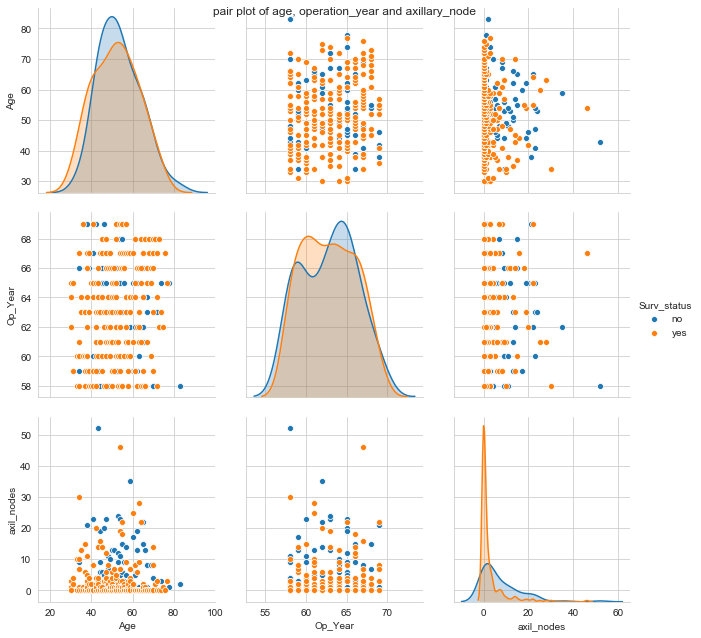

In [69]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.

sns.set_style("whitegrid")
sns.pairplot(df, hue = "Surv_status", vars = ["Age", "Op_Year", "axil_nodes"], size = 3)
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.show()

## Conclusion


* The two classes are not linearly separable, there is too much overlapping of the two classes, hence simple model will not       work in this case 
* The dataset is imbalance, there are more than 70% of cases are of survival and  less than 25% cases of not survival.
* There are many outliers in the Aillary nodes column
* Maximum number of opration is done in the year of 1963 and 1964
* Axillary nodes  is somehow giving some intution about the data,patients less tha 10 axillary nodes have higher chances of       survival
* Patients greatot than 75 age do not survived